In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv("C:\\Users\\sendm\\Downloads\\All-India-Rainfall-Act_Dep_1901_to_2019_0.csv")

In [93]:
print(df.head())
print(df.info())

   YEAR    JUN    JUL    AUG    SEP  JUN-SEP
0  1901  111.0  243.2  273.6  124.6    752.4
1  1902  109.0  282.8  201.8  201.0    794.7
2  1903  117.0  292.0  271.7  200.9    881.7
3  1904  165.2  263.1  205.2  131.7    765.2
4  1905   92.3  254.9  201.4  180.0    728.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     119 non-null    int64  
 1   JUN      119 non-null    float64
 2   JUL      119 non-null    float64
 3   AUG      119 non-null    float64
 4   SEP      119 non-null    float64
 5   JUN-SEP  119 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 5.7 KB
None


In [65]:
print(df.describe())

              YEAR         JUN         JUL         AUG         SEP  \
count   119.000000  119.000000  119.000000  119.000000  119.000000   
mean   1960.000000  167.252941  291.192437  258.613445  173.120168   
std      34.496377   35.450870   39.713325   34.787985   36.899645   
min    1901.000000   87.900000  140.300000  192.500000   96.600000   
25%    1930.500000  142.950000  268.900000  233.800000  144.950000   
50%    1960.000000  165.200000  294.100000  258.700000  172.600000   
75%    1989.500000  190.850000  317.600000  287.700000  199.450000   
max    2019.000000  274.600000  376.300000  336.100000  282.500000   

           JUN-SEP  
count   119.000000  
mean    890.191597  
std      86.652632  
min     682.100000  
25%     822.350000  
50%     901.000000  
75%     955.300000  
max    1098.400000  


In [66]:
print(df.isnull().sum())

YEAR       0
JUN        0
JUL        0
AUG        0
SEP        0
JUN-SEP    0
dtype: int64


In [67]:
print(df.dtypes)

YEAR         int64
JUN        float64
JUL        float64
AUG        float64
SEP        float64
JUN-SEP    float64
dtype: object


In [68]:
print(df.shape)

(119, 6)


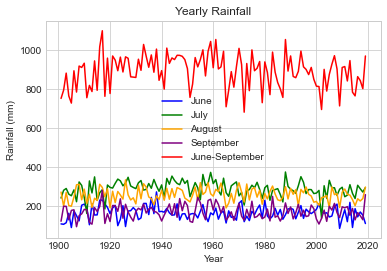

In [69]:

plt.plot(df['YEAR'], df['JUN'], label='June', color='blue')
plt.plot(df['YEAR'], df['JUL'], label='July', color='green')
plt.plot(df['YEAR'], df['AUG'], label='August', color='orange')
plt.plot(df['YEAR'], df['SEP'], label='September', color='purple')
plt.plot(df['YEAR'], df['JUN-SEP'], label='June-September', color='red')
plt.legend()
plt.title('Yearly Rainfall')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.show()

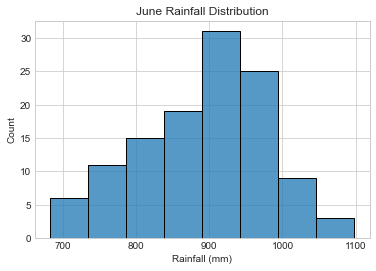

In [70]:
sns.histplot(df['JUN-SEP'])
plt.title('June Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.show()


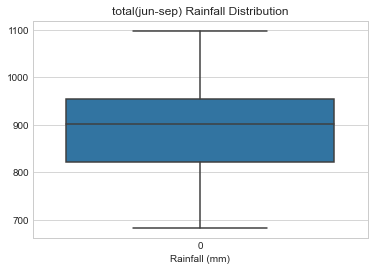

In [71]:
sns.boxplot(df['JUN-SEP'])
plt.title('total(jun-sep) Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.show()

Text(0, 0.5, 'PEAK Rainfall (in mm)')

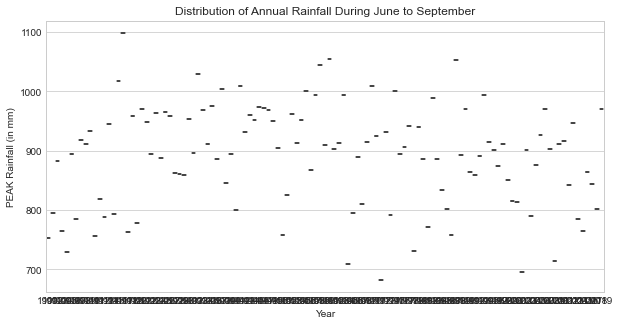

In [72]:
plt.figure(figsize=(10,5))
sns.boxplot(x='YEAR', y='JUN-SEP', data=df)
plt.title('Distribution of Annual Rainfall During June to September')
plt.xlabel('Year')
plt.ylabel('PEAK Rainfall (in mm)')

In [73]:
# Compute the total rainfall for each month over the years
monthly_rainfall = df.iloc[:, 1:].sum()

In [74]:
max_month = monthly_rainfall.idxmax()
max_rainfall = monthly_rainfall[max_month]

In [75]:
min_month = monthly_rainfall.idxmin()
min_rainfall = monthly_rainfall[min_month]

In [76]:
print(f"The month with the total rainfall is {max_month} with {max_rainfall:.2f} mm.")
print(f"The month with the least rainfall is {min_month} with {min_rainfall:.2f} mm.")

The month with the total rainfall is JUN-SEP with 105932.80 mm.
The month with the least rainfall is JUN with 19903.10 mm.


In [77]:
jun_sep = df[['JUN', 'JUL', 'AUG', 'SEP']]

In [78]:
most_rainfall = jun_sep.mean().idxmax()
least_rainfall = jun_sep.mean().idxmin()

In [79]:
print("Month with the most rainfall: ", most_rainfall)
print("Month with the least rainfall: ", least_rainfall)

Month with the most rainfall:  JUL
Month with the least rainfall:  JUN


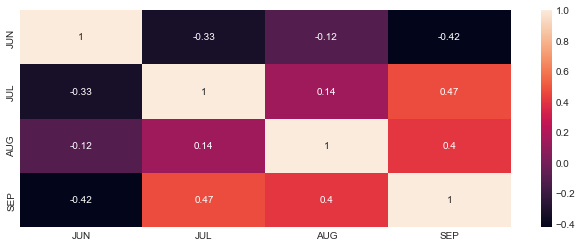

In [80]:
plt.figure(figsize=(11,4))
corr_matrix = df.corr()
sns.heatmap(corr_matrix[['JUN','JUL','AUG','SEP',]].corr(),annot=True)
plt.show()

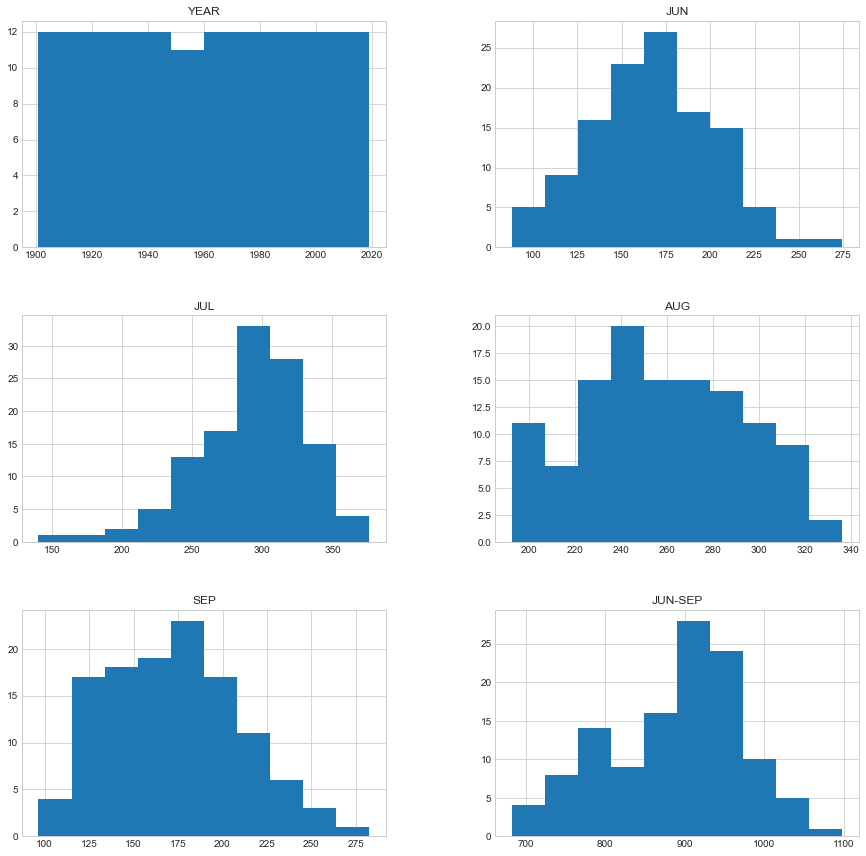

In [81]:
df.hist(figsize=(15,15));

In [82]:
df.set_index('YEAR', inplace=True)

Text(0, 0.5, 'Rainfall (mm)')

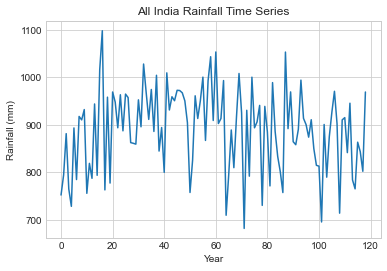

In [101]:
plt.plot(df.index, df['JUN-SEP'], label='June-September')
plt.title('All India Rainfall Time Series')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')

In [96]:
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')


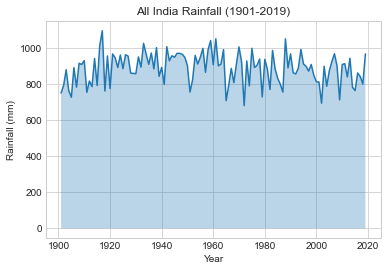

In [97]:
plt.plot(df['YEAR'], df['JUN-SEP'])
plt.fill_between(df['YEAR'], df['JUN-SEP'], alpha=0.3)
plt.title('All India Rainfall (1901-2019)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.show()

In [103]:
df['Total'] = df['JUN'] + df['JUL'] + df['AUG'] + df['SEP']

In [104]:
df_melt = pd.melt(df, id_vars=['YEAR'], value_vars=['JUN', 'JUL', 'AUG', 'SEP'], var_name='Month', value_name='Rainfall')

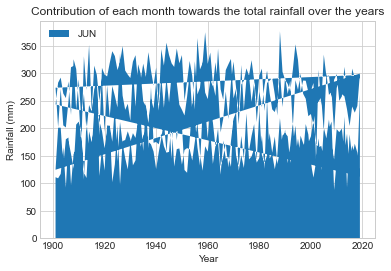

In [105]:
plt.stackplot(df_melt['YEAR'], df_melt['Rainfall'], labels=df_melt['Month'])
plt.legend(loc='upper left')
plt.title('Contribution of each month towards the total rainfall over the years')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.show()